In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization,GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

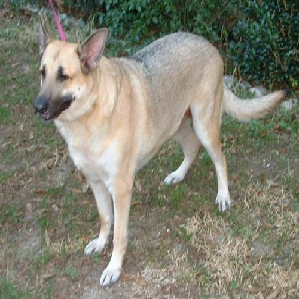

In [2]:
from tensorflow.keras.preprocessing import image
image.load_img(r'/content/drive/MyDrive/collab_mount/cat_dog_sub/test/dog/10535.jpg', target_size=(299,299))

In [3]:
base_model = MobileNetV2(weights='imagenet',include_top=False)
base_model.summary()

9406464/9406464 [==============================] - 0s 0us/step
Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 Conv1 (Conv2D)                 (None, None, None,   864         ['input_1[0][0]']                
                                32)                                                               
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, None, None,   128         ['Conv1[0][0]']                  
                

In [4]:
CLASSES=2
baseoutput = base_model.output
globavg = GlobalAveragePooling2D()(baseoutput)
drpout1 = Dropout(0.4)(globavg)
bn1 = BatchNormalization()(drpout1)
dense1 = Dense(256, activation='relu')(bn1)
drpout2 = Dropout(0.4)(dense1)
predictions = Dense(CLASSES,activation='softmax')(drpout2)

model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
  layer.trainable=False

model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])



In [5]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 Conv1 (Conv2D)                 (None, None, None,   864         ['input_1[0][0]']                
                                32)                                                               
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, None, None,   128         ['Conv1[0][0]']                  
                                32)                                                           

In [6]:
width=299
height=299
batch_size=32
TRAIN_DIR =r'/content/drive/MyDrive/collab_mount/cat_dog_sub/train'
TEST_DIR =r'/content/drive/MyDrive/collab_mount/cat_dog_sub/test'

train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator =train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size = (height,width),
    batch_size=batch_size,
    class_mode='categorical'
)


validation_generator =validation_datagen.flow_from_directory(
    TEST_DIR,
    target_size = (height,width),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 1811 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [7]:
data=next(train_generator)

In [8]:
data[1].shape

(32, 2)

In [9]:
epochs=1
STEPS_PER_EPOCH= train_generator.n//train_generator.batch_size
VALIDATION_STEP=validation_generator.n//validation_generator.batch_size

In [10]:
STEPS_PER_EPOCH,VALIDATION_STEP

(56, 62)

In [11]:
model.fit(train_generator, epochs=epochs, steps_per_epoch=STEPS_PER_EPOCH, validation_data=validation_generator,
          validation_steps=VALIDATION_STEP, verbose=1)

56/56 [==============================] - 996s 18s/step - loss: 0.2272 - accuracy: 0.9247 - val_loss: 0.1456 - val_accuracy: 0.9451


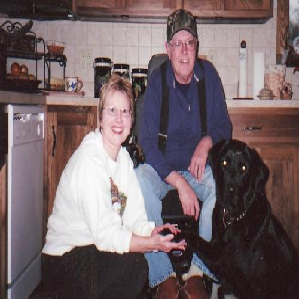

In [13]:
from tensorflow.keras.preprocessing import image
img=image.load_img(r'/content/drive/MyDrive/collab_mount/cat_dog_sub/test/dog/1736.jpg', target_size=(299,299))
img

In [14]:
x=image.img_to_array(img)
x=preprocess_input(x)
x.shape

(299, 299, 3)

In [15]:
x=np.expand_dims(x,axis=0)
x.shape

(1, 299, 299, 3)

In [16]:
pred=model.predict(x)[0]

1/1 [==============================] - 1s 1s/step


In [17]:
pred

array([0.04862945, 0.95137054], dtype=float32)

In [18]:
train_generator.class_indices

{'cat': 0, 'dog': 1}

In [19]:
model.predict(x)

1/1 [==============================] - 0s 88ms/step


array([[0.04862945, 0.95137054]], dtype=float32)